<a href="https://colab.research.google.com/github/TriciaButler/MAT-494-Data-Science/blob/main/Tricia_B_HW_1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tricia Butler HW 1.3

*   QR Decompostion
*   Least-Squares

# QR Decompostion
Matrix A is broken down into the product of A = QR (Gram-Schmidt Method).  
Q is an orthogonal matrix.  
R is an upper triagular matrix.

In [18]:
import numpy as np
A = np.array([[12,-51,4],[6,167,-68],[-4,24,-41]])
print("Vector A")
print(A)
v1 = np.array([12,6,-4])
v2 = np.array([-51,167,24])
v3 = np.array([4,-68,-41])
print("v1, v2, and v3")
print(v1, v2, v3)
print("Normalize v1")
print("u1 = v1/length of v1")
lengthv1 = np.linalg.norm(v1)
u1 = v1/np.linalg.norm(v1)
print("u1 = ",u1)
print("Now make v2 orthogonal to u1.")
print("u2 = v2 - Proj(v1)v2")
proj_of_v2_on_v1 = (np.dot(v2, v1)/lengthv1**2)*v1
U2 = v2 - proj_of_v2_on_v1
print("u2 = ", U2)
print("Normalize u2")
lengthU2 = np.linalg.norm(U2)
u2 = U2/np.linalg.norm(U2)
print("u2 = ", u2)
print("Now make v3 orthogonal to u1 and u2.")
print("u3 = v3 - ((v3dotu1)u1 + ((v3dotu2)u2)")
a = (np.dot(v3, u1))
b = (np.dot(v3, u2))
U3 = v3 - ((np.multiply(a,u1)) + (np.multiply(b,u2)) )
print("u3 = ", U3)
print("Normalize u3")
lengthU3 = np.linalg.norm(U3)
u3 = U3/np.linalg.norm(U3)
print("u3 = ", u3)
print("Vector Q = [u1, u2, u3]")
Q = np.array(([6/7,-69/175,-58/175],[3/7,158/175,6/175],[-2/7,6/35,-33/35]))
print(Q)

Vector A
[[ 12 -51   4]
 [  6 167 -68]
 [ -4  24 -41]]
v1, v2, and v3
[12  6 -4] [-51 167  24] [  4 -68 -41]
Normalize v1
u1 = v1/length of v1
u1 =  [ 0.85714286  0.42857143 -0.28571429]
Now make v2 orthogonal to u1.
u2 = v2 - Proj(v1)v2
u2 =  [-69. 158.  30.]
Normalize u2
u2 =  [-0.39428571  0.90285714  0.17142857]
Now make v3 orthogonal to u1 and u2.
u3 = v3 - ((v3dotu1)u1 + ((v3dotu2)u2)
u3 =  [-11.6   1.2 -33. ]
Normalize u3
u3 =  [-0.33142857  0.03428571 -0.94285714]
Vector Q = [u1, u2, u3]
[[ 0.85714286 -0.39428571 -0.33142857]
 [ 0.42857143  0.90285714  0.03428571]
 [-0.28571429  0.17142857 -0.94285714]]


Matrix Q is an orthogonal matrix, because each vector forms a right angle with the other two vectors (which is difficult to see on this graph).


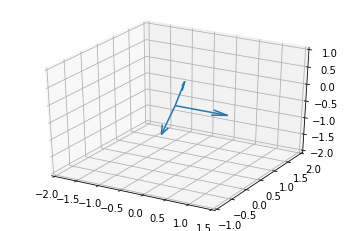

In [47]:
print("Matrix Q is an orthogonal matrix, because each vector forms a right angle with the other two vectors (which is difficult to see on this graph).")
import numpy as np
import matplotlib.pyplot as plt
m = [6/7, 3/7, -2/7]
n = [-69/175, 158/175, 6/35]
l = [-58/175, 6/175, -33/35]
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlim([-2,1.5])
ax.set_ylim([-1,2])
ax.set_zlim([-2,1])
start = [0,0,0]
ax.quiver(start[0], start[1], start[2], m[0], m[1], m[2])
ax.quiver(start[0], start[1], start[2], n[0], n[1], n[2])
ax.quiver(start[0], start[1], start[2], l[0], l[1], l[2])
plt.show()

In [29]:
print("Q(Transposed)A = Q(Transposed)QR = R")
QT = np.transpose(Q)
R = QT @ A
r = np.rint(R)
print("Vector R is an upper triangular matrix.")
print(r)


Q(Transposed)A = Q(Transposed)QR = R
Vector R is an upper triangular matrix.
[[ 14.  21. -14.]
 [ -0. 175. -70.]
 [  0.  -0.  35.]]


# Least-squares

Ax = b, where A is an n x m matrix and n > m.  
Rx = Q(Transposed)b.  
x = R^-1*Q(Transposed)b.  
First find Q and R.

In [3]:
import numpy as np
def gram_schmidt(A):
    """Gram-schmidt Orthogonalization"""
    Q=np.zeros_like(A)
    cnt = 0
    for a in A.T:
        u = np.copy(a)
        for i in range(0, cnt):
            u -= np.dot(np.dot(Q[:, i].T, a), Q[:, i]) 
        e = u / np.linalg.norm(u)  # normalization 
        Q[:, cnt] = e
        cnt += 1
    R = np.dot(Q.T, A)
    return (Q, R)

np.set_printoptions(precision=4, suppress=True)
A = np.array([[1,-1],[1, 0],[1, 1]], dtype = float)

(Q, R) = gram_schmidt(A)
print(Q)
print(R)
print(np.dot(Q, R))

[[ 0.5774 -0.7071]
 [ 0.5774  0.    ]
 [ 0.5774  0.7071]]
[[1.7321 0.    ]
 [0.     1.4142]]
[[ 1. -1.]
 [ 1.  0.]
 [ 1.  1.]]


In [12]:
b = np.array([[-4],[4],[6]], dtype = float)
print("Vector b")
print(b)
QT = np.transpose(Q)
print("Q Transposed")
print(QT)
R1 = np.linalg.inv(R)
print("Inverse of R")
print(R1)
print("x = R^-1*Q(Transposed)b")
mult1 = np.dot(QT,b)
mult2 = np.dot(R1,mult1)
print(mult2)

Vector b
[[-4.]
 [ 4.]
 [ 6.]]
Q Transposed
[[ 0.5774  0.5774  0.5774]
 [-0.7071  0.      0.7071]]
Inverse of R
[[0.5774 0.    ]
 [0.     0.7071]]
x = R^-1*Q(Transposed)b
[[2.]
 [5.]]
